In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
cd C:\Users\kas\Documents\Python_files\titanic

C:\Users\kas\Documents\Python_files\titanic


In [4]:
train=pd.read_csv("train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
len(train)

891

In [6]:
for i in range(12):
    tnull=train[train.columns[i]].isnull().sum()
    if tnull>0:
        print(train.columns[i],":",(tnull/891)*100)

Age : 19.865319865319865
Cabin : 77.10437710437711
Embarked : 0.22446689113355783


In [7]:
test=pd.read_csv("test.csv")

In [8]:
len(test)

418

In [9]:
for i in range(11):
    tnull=test[test.columns[i]].isnull().sum()
    if tnull>0:
        print(test.columns[i],":",(tnull/418)*100)

Age : 20.574162679425836
Fare : 0.23923444976076555
Cabin : 78.22966507177034


Planning on dropping cabin, embarked, fare, ticket, sibsp, parch, name.
Fare and class are related; Ticket isn't necessary as an identifier since id exists; Cabin is mostly empty; Embarked doesn't seem that important

Possible issues: family size might play a role if female with children; name might matter for title; embarked may indicate class as locations of where the higher class may have gotten on and the data information says the priority was women, children, and higher class

In [10]:
train2=pd.DataFrame(train)

In [11]:
train2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
train2.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [13]:
train2=pd.get_dummies(train2,columns=['Sex'])

In [14]:
meanAge=train2["Age"].mean()
meanAge

29.69911764705882

In [15]:
medAge=train2["Age"].median()
medAge

28.0

In [16]:
train2[:40]

,PassengerId,Survived,Pclass,Age,Sex_female,Sex_male
0,1,0,3,22.0,0,1
1,2,1,1,38.0,1,0
2,3,1,3,26.0,1,0
3,4,1,1,35.0,1,0
4,5,0,3,35.0,0,1
5,6,0,3,NaN,0,1
6,7,0,1,54.0,0,1
7,8,0,3,2.0,0,1
8,9,1,3,27.0,1,0
9,10,1,2,14.0,1,0


Filling the empty ages with 29 since that is between the mean and median. This may not be the best but will go back to it for imroved results

In [17]:
train2=train2.fillna(29)
train2[:40]

,PassengerId,Survived,Pclass,Age,Sex_female,Sex_male
0,1,0,3,22.0,0,1
1,2,1,1,38.0,1,0
2,3,1,3,26.0,1,0
3,4,1,1,35.0,1,0
4,5,0,3,35.0,0,1
5,6,0,3,29.0,0,1
6,7,0,1,54.0,0,1
7,8,0,3,2.0,0,1
8,9,1,3,27.0,1,0
9,10,1,2,14.0,1,0


In [18]:
train2.drop(['Sex_male'], axis=1, inplace=True)
#sex can be determined by the value of sex_female

In [19]:
train2[:5]

,PassengerId,Survived,Pclass,Age,Sex_female
0,1,0,3,22.0,0
1,2,1,1,38.0,1
2,3,1,3,26.0,1
3,4,1,1,35.0,1
4,5,0,3,35.0,0


In [20]:
count=0
for i in range(891):
    if train2["Survived"][i]==1:
        count=count+1
print(count,count/891)
#38 percent is total survived

342 0.3838383838383838


# Cleaning the data: first attempt

In [70]:
train3=pd.DataFrame(train)

In [71]:
train3.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [72]:
train3=train3.dropna(axis=0)

In [73]:
train3['Age']=np.where(train3['Age'].between(0,10),0,train3['Age'])
train3['Age']=np.where(train3['Age'].between(10.5,30),1,train3['Age'])
train3['Age']=np.where(train3['Age'].between(30.5,60),2,train3['Age'])
train3['Age']=np.where(train3['Age'].between(60.5,100),3,train3['Age'])

In [75]:
train3=pd.get_dummies(train3,columns=['Sex'])
train3=pd.get_dummies(train3,columns=['Age'])
train3=pd.get_dummies(train3,columns=['Pclass'])

In [88]:
train3[:10]

,PassengerId,Survived,Sex_female,Sex_male,Age_0.0,Age_1.0,Age_2.0,Age_3.0,Pclass_1,Pclass_2,Pclass_3
0,1,0,0,1,0,1,0,0,0,0,1
1,2,1,1,0,0,0,1,0,1,0,0
2,3,1,1,0,0,1,0,0,0,0,1
3,4,1,1,0,0,0,1,0,1,0,0
4,5,0,0,1,0,0,1,0,0,0,1
6,7,0,0,1,0,0,1,0,1,0,0
7,8,0,0,1,1,0,0,0,0,0,1
8,9,1,1,0,0,1,0,0,0,0,1
9,10,1,1,0,0,1,0,0,0,1,0
10,11,1,1,0,1,0,0,0,0,0,1


In [78]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [79]:
X=train3.values
Y=train3['Survived'].values

In [80]:
X=np.delete(X,1,axis=1)

In [81]:
X=np.delete(X,0,axis=1)

In [90]:
XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y)
nsplit=1000
depth=1
errors=[]

In [91]:
while (depth < 7):
    errs=[]
    for j in range(nsplit):
        XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y)
        DT=tree.DecisionTreeClassifier(max_depth=depth)
        DT.fit(XTRAIN,YTRAIN)
        YP=DT.predict(XTEST)
        errs.append(1-accuracy_score(YTEST,YP))
    print("Decision Tree Depth = %d mean error = %7.6f SD=%7.6f"\
          %(depth,np.mean(errs),np.std(errs)))
    errors.append(np.mean(errs))
    depth = depth + 1

Decision Tree Depth = 1 mean error = 0.220028 SD=0.026047
Decision Tree Depth = 2 mean error = 0.212240 SD=0.027499
Decision Tree Depth = 3 mean error = 0.207553 SD=0.026333
Decision Tree Depth = 4 mean error = 0.205508 SD=0.024900
Decision Tree Depth = 5 mean error = 0.208112 SD=0.025645
Decision Tree Depth = 6 mean error = 0.208754 SD=0.025076


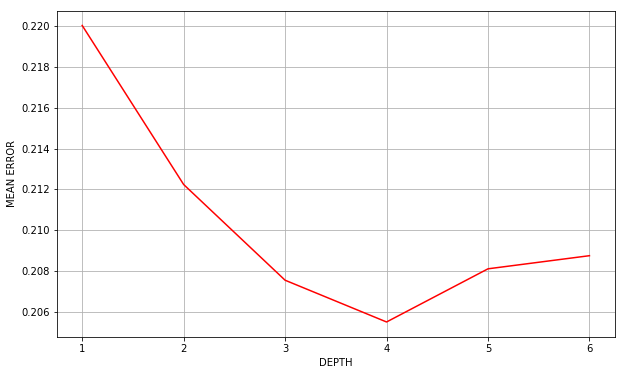

In [99]:
plt.plot((range(1,7)), errors, color='red')
plt.xlabel("DEPTH")
plt.ylabel("MEAN ERROR")
plt.grid()
plt.gcf().set_size_inches(10,6)

In [100]:
pwd

'C:\\Users\\kas\\Documents\\Python_files\\titanic'